In [31]:
import numpy as np
import numpy.random as rnd

rnd.seed(4)
m = 1000
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:900])
X_test = scaler.transform(data[900:])

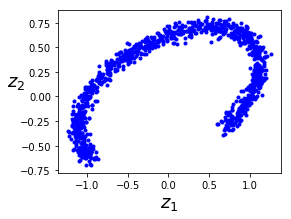

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,3))
plt.plot(data[:,0], data[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()

In [33]:
import tensorflow as tf

n_inputs = 3
n_hidden = 2

n_outputs = n_inputs

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()

In [29]:
n_iterations = 1000
codings = hidden
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_test})
    outputs_val = outputs.eval(feed_dict={X: X_train})
    


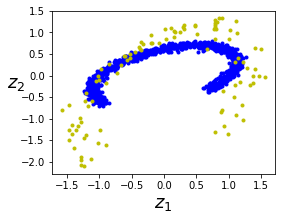

In [34]:
fig = plt.figure(figsize=(4,3))
plt.plot(data[:,0], data[:, 1], "b.")
#plt.plot(codings_val[:,0], codings_val[:, 1], "r.")
plt.plot(outputs_val[:,0], outputs_val[:, 1], "y.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()